In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
# Download data for NIFTY-50 and selected stocks
nifty_data = yf.download('^NSEI', start='2020-01-01', end='2020-12-31')
stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'ITC.NS', 'LT.NS', 'SBIN.NS', 'BAJFINANCE.NS']  # Add more as needed

# Download stock data
stock_data = yf.download(stocks, start='2020-01-01', end='2020-12-31')['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


In [ ]:
stock_data.head()

Ticker,BAJFINANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2020-01-01 00:00:00+00:00,4160.838867,1227.428589,518.854004,655.615356,194.749054,1669.007446,1195.268677,671.074280,314.799194,2015.370117
2020-01-02 00:00:00+00:00,4175.342773,1235.252441,522.575562,653.702271,196.180450,1666.515015,1227.524170,682.498901,319.364197,2006.118896
2020-01-03 00:00:00+00:00,4123.619141,1217.636841,520.883972,663.756592,195.076202,1652.108398,1218.171631,683.321350,314.093231,2046.099365
2020-01-06 00:00:00+00:00,3930.145264,1191.285400,508.172455,657.394836,192.295258,1647.572266,1201.473511,667.473572,300.256958,2045.912964
2020-01-07 00:00:00+00:00,3940.912842,1210.149048,505.465851,647.652100,192.499756,1665.817139,1204.895020,677.742371,299.692169,2050.934570


In [ ]:
# Calculate daily returns
nifty_data['Return'] = nifty_data['Adj Close'].pct_change()
stock_returns = stock_data.pct_change()

Cross Sectional Absolute Deviation (CSAD)

In [ ]:
def calculate_csad(stock_returns, market_return):
    csad = (stock_returns.sub(market_return, axis=0).abs()).mean(axis=1)
    return csad

csad = calculate_csad(stock_returns, nifty_data['Return'])

In [ ]:
csad

,0
Date,
2020-01-01 00:00:00+00:00,NaN
2020-01-02 00:00:00+00:00,0.007587
2020-01-03 00:00:00+00:00,0.008928
2020-01-06 00:00:00+00:00,0.011982
2020-01-07 00:00:00+00:00,0.007519
...,...
2020-12-23 00:00:00+00:00,0.007454
2020-12-24 00:00:00+00:00,0.010502
2020-12-28 00:00:00+00:00,0.006837


Cross Sectional Standard Deviation (CSSD)

In [ ]:
def calculate_cssd(stock_returns, market_return):
    cssd = (stock_returns.sub(market_return, axis=0) ** 2).mean(axis=1).apply(np.sqrt)
    return cssd

cssd = calculate_cssd(stock_returns, nifty_data['Return'])

In [ ]:
cssd

,0
Date,
2020-01-01 00:00:00+00:00,NaN
2020-01-02 00:00:00+00:00,0.009374
2020-01-03 00:00:00+00:00,0.011647
2020-01-06 00:00:00+00:00,0.014898
2020-01-07 00:00:00+00:00,0.009168
...,...
2020-12-23 00:00:00+00:00,0.008746
2020-12-24 00:00:00+00:00,0.011943
2020-12-28 00:00:00+00:00,0.008985


Correlation Analysis

In [ ]:
# Correlation matrix with NIFTY returns
correlation = stock_returns.corrwith(nifty_data['Return'])
correlation

,0
Ticker,
BAJFINANCE.NS,0.747458
HDFCBANK.NS,0.829112
ICICIBANK.NS,0.844203
INFY.NS,0.684565
ITC.NS,0.541107
KOTAKBANK.NS,0.743001
LT.NS,0.739349
RELIANCE.NS,0.738988
SBIN.NS,0.769683


Granger Causality Test

Volume Return Analysis

In [ ]:
# Example for analyzing relationship between trading volume and returns for a specific stock
for stock in stocks:
    stock_data[stock, 'Volume'] = yf.download(stock, start='2020-01-01', end='2020-12-31')['Volume']
    volume = stock_data[stock, 'Volume']
    returns = stock_returns[stock]

    # Calculate correlation between volume and returns
    correlation_volume_returns = returns.corr(volume)
    print(f"Correlation between Volume and Returns for {stock}: {correlation_volume_returns}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation between Volume and Returns for RELIANCE.NS: 0.17562042388755003
Correlation between Volume and Returns for TCS.NS: 0.15637129291624027
Correlation between Volume and Returns for INFY.NS: 0.2690055475579686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Correlation between Volume and Returns for HDFCBANK.NS: 0.11944147691843025
Correlation between Volume and Returns for ICICIBANK.NS: 0.05967664611278185
Correlation between Volume and Returns for KOTAKBANK.NS: 0.14359765889823337



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation between Volume and Returns for ITC.NS: 0.12621791950827882
Correlation between Volume and Returns for LT.NS: 0.19959387865566566
Correlation between Volume and Returns for SBIN.NS: 0.1877889005558868
Correlation between Volume and Returns for BAJFINANCE.NS: 0.17305279007937063


Visualizations

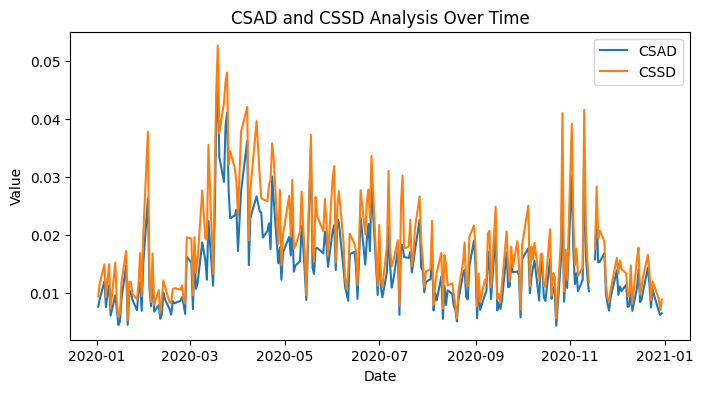

In [ ]:
import matplotlib.pyplot as plt

# Plot CSAD and CSSD
plt.figure(figsize=(8, 4))
plt.plot(csad, label='CSAD')
plt.plot(cssd, label='CSSD')
plt.title('CSAD and CSSD Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


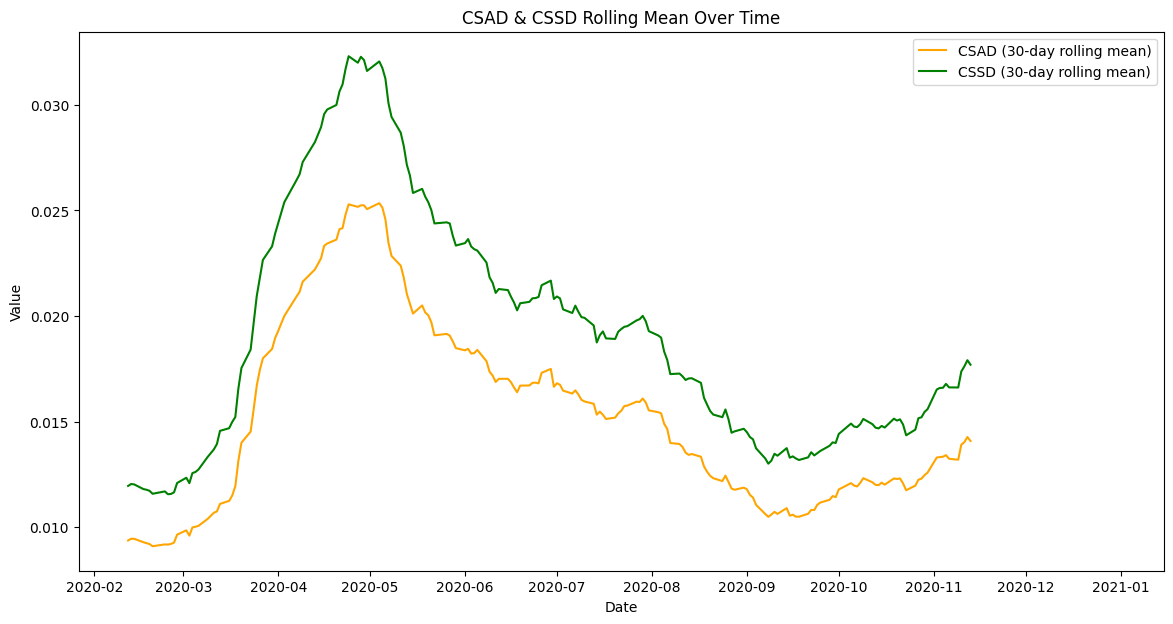

In [ ]:
# Calculate rolling window (e.g., 30 days) for CSAD and CSSD
csad_rolling = csad.rolling(window=30).mean()
cssd_rolling = cssd.rolling(window=30).mean()

# Plot CSAD and CSSD over time
plt.figure(figsize=(14, 7))
plt.plot(csad_rolling, label='CSAD (30-day rolling mean)', color='orange')
plt.plot(cssd_rolling, label='CSSD (30-day rolling mean)', color='green')
plt.title('CSAD & CSSD Rolling Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
#CSAD Regression

In [ ]:
import statsmodels.api as sm

# Prepare the dependent and independent variables for CSSD regression
csad_rolling_mean = csad_rolling.dropna()  # Drop NaN values from rolling CSSD
market_returns = nifty_data['Return'].loc[csad_rolling_mean.index]  # Align with CSSD index

# Define the independent variables
X_csad = pd.DataFrame({
    'Abs_Market_Return': market_returns.abs(),
    'Squared_Market_Return': market_returns**2
})
X_csad = sm.add_constant(X_csad)

# Perform the CSSD regression analysis
csad_model = sm.OLS(csad_rolling_mean, X_csad).fit()
print(csad_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.675
Date:                Tue, 29 Oct 2024   Prob (F-statistic):             0.0104
Time:                        05:58:13   Log-Likelihood:                 768.79
No. Observations:                 190   AIC:                            -1532.
Df Residuals:                     187   BIC:                            -1522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [ ]:
#CSSD Regression

In [ ]:
import statsmodels.api as sm

# Prepare the dependent and independent variables for CSSD regression
cssd_rolling_mean = cssd_rolling.dropna()  # Drop NaN values from rolling CSSD
market_returns = nifty_data['Return'].loc[cssd_rolling_mean.index]  # Align with CSSD index

# Define the independent variables
X_cssd = pd.DataFrame({
    'Abs_Market_Return': market_returns.abs(),
    'Squared_Market_Return': market_returns**2
})
X_cssd = sm.add_constant(X_cssd)

# Perform the CSSD regression analysis
cssd_model = sm.OLS(cssd_rolling_mean, X_cssd).fit()
print(cssd_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.010
Date:                Tue, 29 Oct 2024   Prob (F-statistic):            0.00760
Time:                        05:58:37   Log-Likelihood:                 720.71
No. Observations:                 190   AIC:                            -1435.
Df Residuals:                     187   BIC:                            -1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01


Conclusion:
The CSSD analysis further supports the presence of herding behavior, reinforcing the findings from the CSAD analysis. The negative coefficient of Squared_Market_Return in both models indicates that as market returns increase (positively or negatively), stocks are more likely to move together, which is characteristic of herding behavior.

In [ ]:
#Volume-Return Correlation

In [ ]:
import pandas as pd

# Assuming 'stock_data' DataFrame has individual stock volume columns
# and stock tickers are in a list called 'stocks'

# Combine volume columns for all stocks
total_volume = stock_data[stocks].sum(axis=1).rename('Total_Volume')

# Calculate correlations between returns and total volume for each stock
volume_return_correlations = {}

for stock in stocks:
    # Get the total volume and returns for each stock
    stock_return = stock_returns[stock].loc[total_volume.index]  # Align with volume index

    # Calculate correlation between total volume and returns
    correlation = stock_return.corr(total_volume)
    volume_return_correlations[stock] = correlation

# Print the correlation values
print("Volume-Return Correlations for Each Stock (using total volume):")
for stock, corr in volume_return_correlations.items():
    print(f"{stock}: {corr:.4f}")

Conclusion:
The correlation analysis between trading volume and returns does not provide strong evidence of herding behavior. Combined with the earlier CSAD and CSSD analyses, which did indicate herding, this suggests that investors may not be reacting to volume in a consistent manner, but are instead aligning more with market returns.